# Исследование о рынке заведений общественного питания Москвы

Заказачик исследования, инвестиционный фонд, рассматривает вариант открытия заведения общественного питания в Москве. **Целью настоящей работы** является исследование рынка на предмет поиска его особенностей, которые помогут заказчику оперделиться с типом открываемого заведения (кафе, ресторан, пиццерия, паб или бар), предполагаемым расположением, меню и ценами заведения. 

В рамках исследования планируется оценить:
- каличество представленных заведений по категориям, 
- количество посадочных мест в заведениях по категориям, 
- соотношение сетевых и несетевых мест, 
- топ-15 популярных сетей,
- распределение заведений по районам, включая их количество, категории, средний рейтинг, а также средний чек, медианную цену кофе и пива,
- топ-15 улиц по количеству заведений и улицы, на которых располагается только одно заведение. 

Наконец, для оценки идеи заказчика по открытию кофейни планируется отдельно оценить количество, рейтинги и расположение кофеен города Москвы по районам, определить наличие круглосуточных кофеен, изучить ориентировочную стоимость чашки кофе. 

## Краткие выводы по результатам анализа

По результатам анализа данных:

- лидерами по количеству заведений заведений Москвы являются кафе и рестораны, меньше всего столовых и булочных;
- наибольшее среднее количество посадочных мест у баров/пабов и ресторанов, наименьшее – у кафе;
- средний рейтинг заведений практически не зависит от их принадлежности к той или иной категории;
- несетевые заведения примерно на треть преобладают над сетевыми;
- сетевые места чаще представлены булочными, пиццериями и кофейнями, несетевые - остальными категориями;
- самые популярные сети Москвы - это крупные всероссийские сети (в топ-3 вошли «Шоколадница», «Домино’с Пицца» и «Додо Пицца»);
- по количеству заведений всех категорий с существенным отрывом лидирует Центральный округ;
- Центральный округ является лидером по среднему рейтингу заведений, их количеству, среднему чеку, а также медианной цене кофе и пива;
- наибольшее количество заведений располагается на самых крупных улицах, из топ-5 четыре позиции по данному показателю заняли проспекты - Мира, Вернадского, Ленинский и Ленинградский;
- наименьшее количество заведений - в центре в переулках и на маленьких улицах либо на периферии. 

Наиболее перспективными для открытия новой кофейни являются Западный и Юго-Западный административные округа, поскольку в них наблюдается среднее либо низкое количество заведений данной категории, оба округа отличаются максимальными ценами на чашку капучино, а значит, немного снизив цену можно получить значительное конкурентное преимущество. При этом в обоих округах мало заведений с наивысшим рейтингом.

## Обзор данных

Импортируем необходимые для анализа данных библиотеки.

In [1]:
!pip install folium && !pip install --upgrade pip

'!pip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install geojson

In [3]:
import pandas as pd
import re
from plotly import graph_objects as go 
import seaborn as sns
import folium
from folium import Map, Choropleth
from folium import GeoJson, GeoJsonTooltip
from folium import Map, Marker
from folium.plugins import MarkerCluster
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import json
import geojson
from IPython.display import display, HTML
from IPython.display import Image

Прочитаем файл `moscow_places.csv` с данными (путь к данным храниться в файле формата json) и сохраним его в переменной `data`:

In [4]:
# Чтение JSON файла
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)
 
# Чтение CSV файла с использованием пути из JSON
dataset_path_moscow_places = config['dataset_path_moscow_places']
data = pd.read_csv(dataset_path_moscow_places)

Уберем ограничения при отображении количества столбцов, строк, ширины столбцов.

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


Выведим первые строки набора данных и общую информацию о датафрейме.

In [6]:
data.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                                  hours        lat        lng  \
0                                ежедневно, 10:00–22:00  55.878494  37.478860   
1                                ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00  55.889146  37.525901   
3                                ежедневно, 09:00–22:00  55.881608  37.488860   
4                                ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


В исходном датасете представлено 8406 строк с информацией о заведениях. При этом не для всех заведений указаны данные о часах работы (`hours`), ценовом диапазоне (`price`), среднем чеке (`avg_bill`, `middle_avg_bill`, `middle_coffee_cup`) и количестве посадочных мест (`seats`). 

Колонки с текстовой информацией имеют тип `object`, с числовой - `float`, данные о принадлежности заведения к сети - `int`. Тип данных соответствует содержанию во всех колонках, кроме `seats`, поскольку информация о количестве посадочных мест - это целые числа. Изменим тип данных в данном столбце на `int`:

In [8]:
data['seats'] = data['seats'].fillna(0)
data['seats'] = data['seats'].astype(int)

В целом можно сказать, что представленная в датафрейме информация отличается полнотой, достаточной для дальнейшего проведения исследования. Типы данных в столбцах датафрейма соответствуют его содержимому. 

### Предобработка данных

Проверим наличие явных дубликатов в датафрейме:

In [9]:
data.duplicated().sum()

0

Явные дубликаты в датафрейме отсутствуют. Промерим наличие неявных дубликатов. В первую очередь, проверим отсутствие опечаток в наименовании округов:

In [10]:
unique_district = data['district'].unique()
unique_district = np.sort(data['district'].unique())
for name in unique_district:
    print(name)

Восточный административный округ
Западный административный округ
Северный административный округ
Северо-Восточный административный округ
Северо-Западный административный округ
Центральный административный округ
Юго-Восточный административный округ
Юго-Западный административный округ
Южный административный округ


В наименовании округов неявных дубликатов нет. 

Касательно наименований заведений, в датафрейме содержится колоссальное их количество, при этом разница в строчных и заглавных буквах при одинаковом наименовании вполне может быть не ошибкой при занесении данных в датафрейм, а особенностью нейминга. В этой связи имеет смысл найти заведения, которые имеют общее месторасположение:

In [11]:
data.duplicated(subset = ['lat', 'lng']).sum()

34

Всего нашлось 34 пары таких заведений. Выведем их полный список:

In [12]:
# Найдем дубликаты по столбцам lat и lng
duplicates_mask = data.duplicated(subset=['lat', 'lng'], keep=False)

# Отфильтруем дубликаты и выведим как датафрейм
duplicates_df = data[duplicates_mask]

duplicates_df_st = f'''
<div style="max-height:200px; overflow:auto;">
    {duplicates_df.to_html(index=True)}
</div>
'''

display(HTML(duplicates_df_st))

Большинство совпадений месторасположения - небольшие заведения на общем простанстве торговых центров, однако были выявлены и неявные дубликаты, когда строки отличаются написанием наименования или наличием/отсутствием детальной информации о месте. По результатам анализа дубликатов оставим в датафрейме строки с большим количеством информации и удалим менее информативные. 

In [13]:
indexes_to_drop = [1071, 1430, 1452, 2841, 2866, 5316]
data = data.drop(indexes_to_drop)

Заново проиндексируем датафрейм:

In [14]:
data = data.reset_index(drop=True)

Теперь посмотрим, есть ли возможность заполнить пропущенные данные. 
Очевидно, что данные о времени работы могут быть взяты только из внешних источников, поэтому восстановить их только обработкой данных датафрейма не представляется возможным. Аналогично по данным в колонке `avg_bill`. 
Однако стоит отметить, что в колонке `avg_bill` хранятся данные о 3816 заведениях, в то время как данные о категории цены хранятся только для 3315 строк. Попытаемся восстановить данные о ценовом диапазоне заведения по фактическим имеющимся данным о ценах (как на еду, так и на напитки). 
В первую очередь добавим столбец `middle_beer_glass`:

`middle_beer_glass` — число с оценкой одного бокала пива, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена бокала пива»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт среднее этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Цена бокала пива», то в столбец ничего не войдёт.

In [15]:
def calculate_middle_beer_glass(row):
    if pd.isna(row['avg_bill']) or not row['avg_bill'].startswith('Цена бокала пива'):
        return None
    
    parts = row['avg_bill'].split(':')
    price_info = parts[1].strip().replace('₽', '').replace('от ', '').replace('до ', '')  
    
    if '–' in price_info:
        min_price, max_price = map(int, price_info.split('–'))
        return (min_price + max_price) / 2
    else:
        return int(price_info)

data['middle_beer_glass'] = data.apply(calculate_middle_beer_glass, axis=1)

Теперь рассчитаем ценовые дипазоны (минимальное, максимальное и медианное значения) для среднего чека, чашки капучино и бокала пива:

In [16]:
food_price_ranges = data.loc[(data['avg_bill'].str.contains('Средний счёт', na=False)) \
                    & (data['middle_avg_bill'] > 0)] \
                    .groupby('price')['middle_avg_bill'].agg(['min', 'max', 'median'])
food_price_ranges = food_price_ranges.sort_values(by='median')
food_price_ranges = food_price_ranges.reset_index()
food_price_ranges

price    min      max  median
0         низкие   90.0    600.0   180.0
1        средние  165.0   2150.0   500.0
2  выше среднего  375.0   4500.0  1250.0
3        высокие  950.0  35000.0  2000.0

In [17]:
coffee_price_ranges = data.loc[data['avg_bill'].str.contains('Цена чашки капучино', na=False)]\
                      .groupby('price')['middle_coffee_cup'].agg(['min', 'max', 'median'])
coffee_price_ranges = coffee_price_ranges.sort_values(by = 'median')
coffee_price_ranges = coffee_price_ranges.reset_index()
coffee_price_ranges

price    min     max  median
0         низкие   60.0   256.0   139.0
1        средние   60.0  1568.0   200.0
2  выше среднего  150.0   256.0   203.0
3        высокие  250.0   250.0   250.0

In [18]:
beer_price_ranges = data.loc[data['avg_bill'].str.contains('Цена бокала пива', na=False)]\
                    .groupby('price')['middle_beer_glass'].agg(['min', 'max', 'median'])
beer_price_ranges = beer_price_ranges.sort_values(by = 'median')
beer_price_ranges = beer_price_ranges.reset_index()
beer_price_ranges

price    min    max  median
0        средние  100.0  425.0   277.5
1  выше среднего  150.0  650.0   340.0
2        высокие  290.0  685.0   350.0

Наконец заполним пропуски в столбце `price` в том случае, если в соответствующих строчках в столбцах `middle_avg_bill`, `middle_coffee_cup` или `middle_beer_glass` есть ценовые значения. В качестве верхних порогов ценового диапазона используем рассчитанные ранее для каждой категории медианные значения, поскольку выявленные ценовые диапазоны не являются строгими и минимальные значения следующей категории пересекаются с максимальными значениями предыдущей. 

In [19]:
#Заполнение пропусков в столбце price для среднего счета

def assign_price_category_food(row):
    if pd.isna(row['price']) and 'Средний счёт' in str(row['avg_bill']):
        median_price = row['middle_avg_bill']
        # Присваиваем категорию цены на основе медианного значения
        if median_price < food_price_ranges.loc[0, 'median']:
            return food_price_ranges.loc[0, 'price']
        elif median_price < food_price_ranges.loc[1, 'median']:
            return food_price_ranges.loc[1, 'price']
        elif median_price < food_price_ranges.loc[2, 'median']:
            return food_price_ranges.loc[2, 'price']
        else:
            return food_price_ranges.loc[3, 'price']
    return row['price']

data['price'] = data.apply(assign_price_category_food, axis=1)

In [20]:
#Заполнение пропусков в столбце price для одной чашки кофе

def assign_price_category_coffee(row):
    if pd.isna(row['price']) and 'Цена чашки капучино' in str(row['avg_bill']):
        median_price = row['middle_coffee_cup']
        # Присваиваем категорию цены на основе медианного значения
        if median_price < coffee_price_ranges.loc[0, 'median']:
            return coffee_price_ranges.loc[0, 'price']
        elif median_price < coffee_price_ranges.loc[1, 'median']:
            return coffee_price_ranges.loc[1, 'price']
        elif median_price < coffee_price_ranges.loc[2, 'median']:
            return coffee_price_ranges.loc[2, 'price']
        else:
            return coffee_price_ranges.loc[3, 'price']
    return row['price']

data['price'] = data.apply(assign_price_category_coffee, axis=1)

In [21]:
#Заполнение пропусков в столбце price для одного бокала пива

def assign_price_category_beer(row):
    if pd.isna(row['price']) and 'Цена бокала пива' in str(row['avg_bill']):
        median_price = row['middle_beer_glass']
        # Присваиваем категорию цены на основе медианного значения
        if median_price < beer_price_ranges.loc[0, 'median']:
            return beer_price_ranges.loc[0, 'price']
        elif median_price < beer_price_ranges.loc[1, 'median']:
            return beer_price_ranges.loc[1, 'price']
        else:
            return beer_price_ranges.loc[2, 'price']
    return row['price']

data['price'] = data.apply(assign_price_category_beer, axis=1)

В результате удалось заполнить 743 пропуска в столбце `price`. Остальные пропуски без привлечения внешних источников информации заполнить невозможно, поэтому для целей настоящего исследования оставим их без заполнения. 

Теперь создадим столбец `street` с названиями улиц из столбца с адресом.

In [22]:
def extract_street_name(address):
    
    # Разбиваем строку по запятой и выбираем элемент с индексом 1, содержащий название улицы
    street = address.split(',')[1]
    
    # Удаляем лишние пробелы с обеих сторон
    return street.strip()

# Применяем функцию к столбцу 'address' и сохраняем результат в новый столбец street
data['street'] = data['address'].apply(extract_street_name)

Создадим столбец `is_24_7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
- логическое значение `True` — если заведение работает ежедневно и круглосуточно;
- логическое значение `False` — в противоположном случае.

In [23]:
def is_24_7(hours_str):
    if isinstance(hours_str, str):
        if 'ежедневно' in hours_str and 'круглосуточно' in hours_str:
            return True
    return False

data['is_24_7'] = data['hours'].apply(is_24_7)

Проверим корректность добавления столбца:

In [24]:
data.head()

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                                  hours        lat        lng  \
0                                ежедневно, 10:00–22:00  55.878494  37.478860   
1                                ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00  55.889146  37.525901   
3                                ежедневно, 09:00–22:00  55.881608  37.488860   
4                                ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0        средние  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  middle_beer_glass  \
0                NaN      0      0                NaN   
1                NaN      0      4                NaN   
2                NaN      0     45                NaN   
3              170.0      0      0                NaN   
4                NaN      1    148                NaN   

                    street  is_24_7  
0            улица Дыбенко    False  
1            улица Дыбенко    False  
2       Клязьминская улица    False  
3  улица Маршала Федоренко    False  
4      Правобережная улица    False

На стадии предобработки данных была заполнена часть пропусков в столбце `price`, а также добавлены столбец с информацией о средней стоимости одного бокала пива, столбец с названиями улиц и столбец с информацией о том, работает ли заведение ежедневно и круглосуточно. 

## Анализ данных

### Категории заведений 

В первую очередь проанализируем, какие категории заведений представлены в данных. Исследуем количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее и построим визуализацию. 

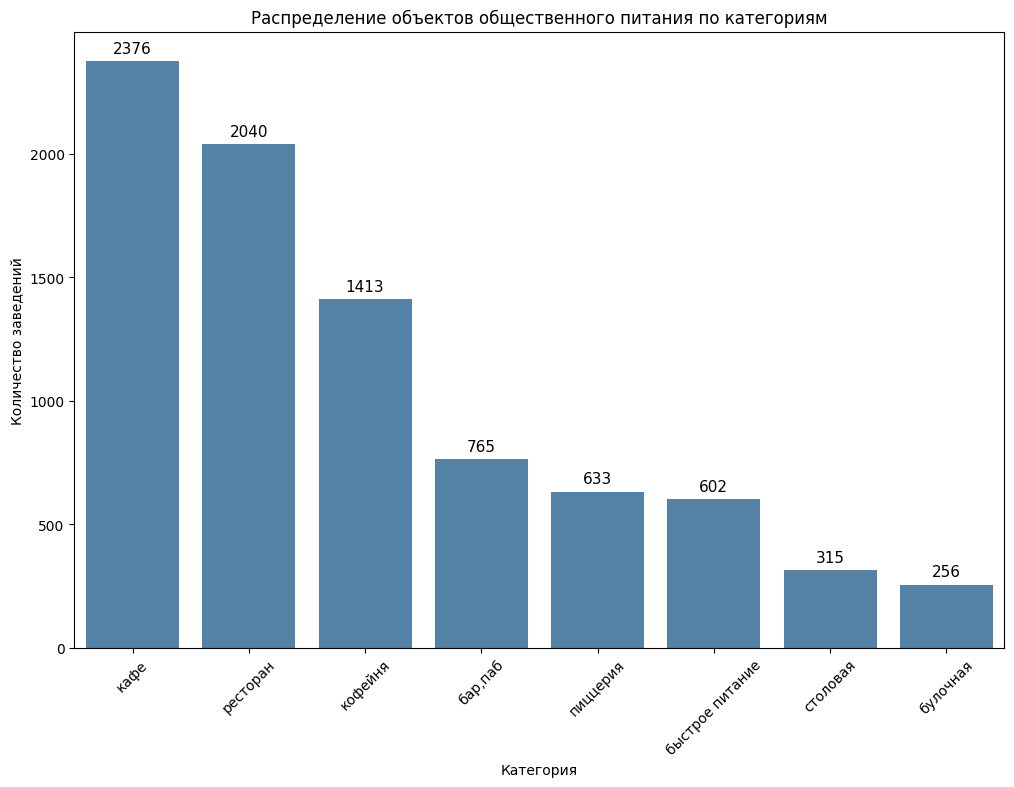

In [25]:
categories = pd.DataFrame(data['category'].value_counts()).reset_index()
categories.columns = ['category', 'count']
categories = categories.sort_values(by='count', ascending=False)

# Построим столбчатую диаграмму
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='category', y='count', data=categories, color='steelblue')

# Добавим метки данных на каждый столбец
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11)
    
# Добавим подписи
plt.title('Распределение объектов общественного питания по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

На диаграмме видно, что наибольшую долю на рынке из всех категорий заведений общественного питания занимают кафе, далее идут рестораны и кофейни. Наименьшим количеством заведений представлена категория - "булочная".

### Количество посадочных мест

Теперь исследуем среднее количество посадочных мест в заведениях по категориям: рестораны, кофейни, пиццерии, бары и так далее, построим визуализацию. 

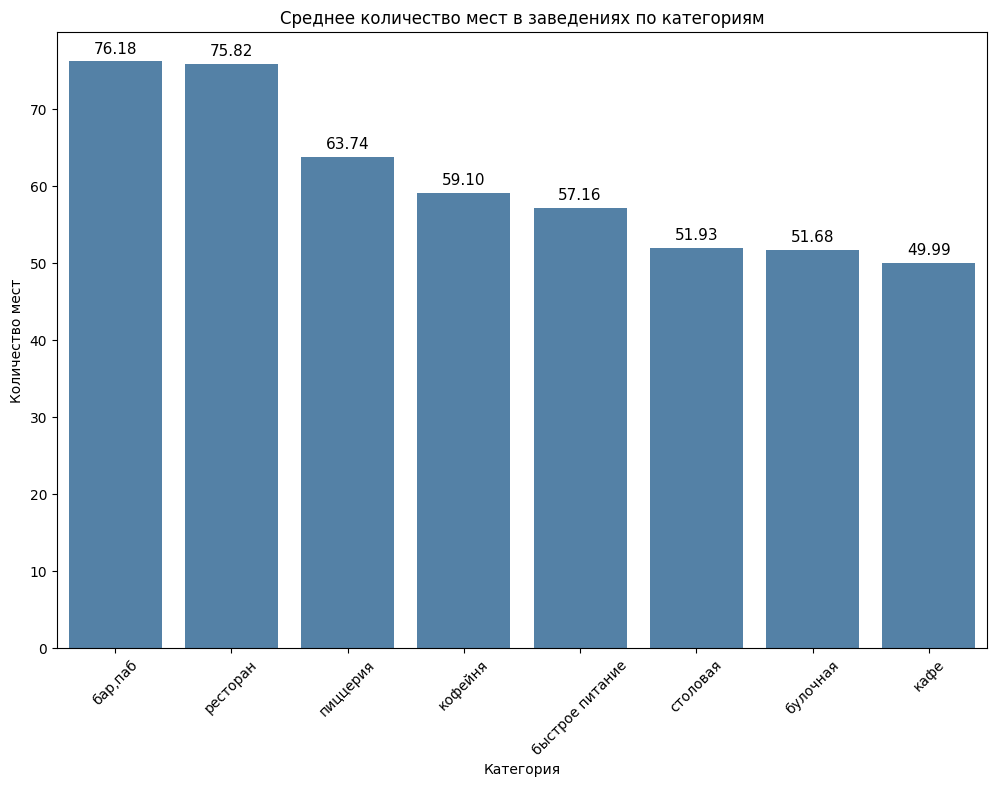

In [26]:
seats = data.groupby('category')['seats'].mean()
seats = seats.sort_values(ascending=False).reset_index()

# Построим столбчатую диаграмму
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='category', y='seats', data=seats, color='steelblue')

# Добавим метки данных на каждый столбец
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11)

# Добавим подписи
plt.title('Среднее количество мест в заведениях по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

Хотя наибольшую долю рынка занимают кафе, по посадочным местам лидируют бары/пабы, а также рестораны. Наименьшее количество посадочных мест у кафе. Такое низкое количество посадочных мест у заведений категории кафе можно объяснить тем фактом, что многие заведения, относящиеся к данной категории, располагаются в общих зонах торговых центров, при этом не имея собственных посадочных мест. Также при поиске неявных дубликатов было выявлено, что у части таких заведений в качестве посадочных мест указаны все имеющиеся посадочные места в торговом центре (например, у нескольких небольших кафе или ресторанов, располагающихся по одному адресу в ТЦ, может быть указано одно и то же количество посадочных мест, около 150). Все это создает искажения для анализа данных. 

### Сетевые и несетевые заведения

Рассмотрим и изобразим соотношение сетевых и несетевых заведений в датасете. 

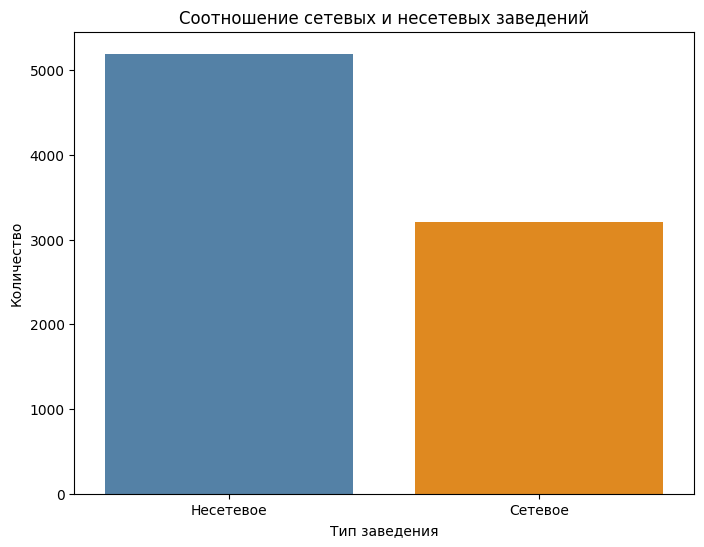

In [27]:
# Преобразуем значения 1 и 0 в текстовые метки
data['chain'] = data['chain'].replace({1: 'Сетевое', 0: 'Несетевое'})

# Построим столбчатую диаграмму seaborn с заданными цветами
plt.figure(figsize=(8, 6))
sns.countplot(x='chain', data=data, palette=['steelblue', 'darkorange'], hue='chain')
plt.title('Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Количество')
plt.show()

По графику видно, что несетевых заведений приблизительно на треть больше, чем сетевых. 

### Категориальное распределение сетевых и несетевых заведений

Теперь выясним, какие категории заведений чаще являются сетевыми. 

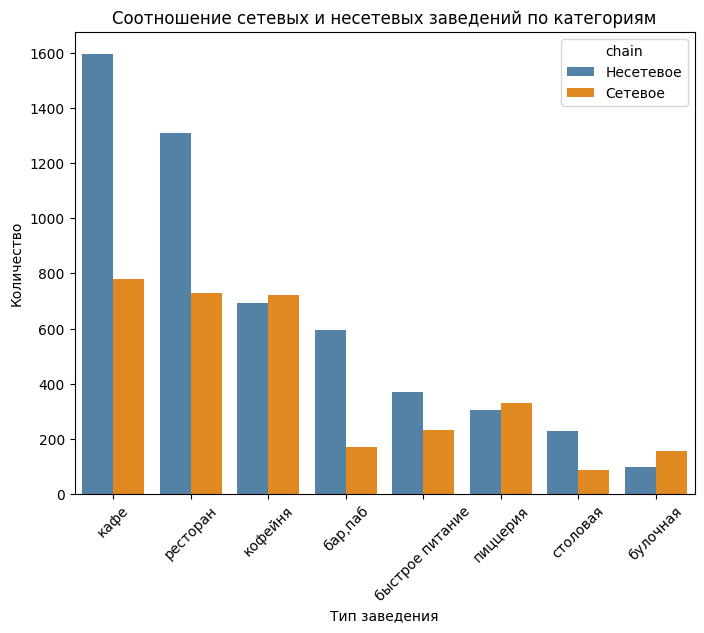

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', 
              data=data, 
              palette=['steelblue', 'darkorange'], 
              hue='chain',
              order=data[data['chain'] == 'Несетевое']['category'].value_counts().index)
plt.title('Соотношение сетевых и несетевых заведений по категориям')
plt.xlabel('Тип заведения')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

Значительный перевес несетевых заведений над сетевыми демонстрируют кафе, рестораны, бары/пабы, заведения быстрого питания и столовые. Напротив кофейни, пиццерии и булочные можно охарактеризовать небольшим преобладанием сетевых мест.

### Топ-15 популярных сетей

На следующем этапе сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве (под популярностью понимается количество заведений этой сети в регионе). Визуализируем полученные данные. 

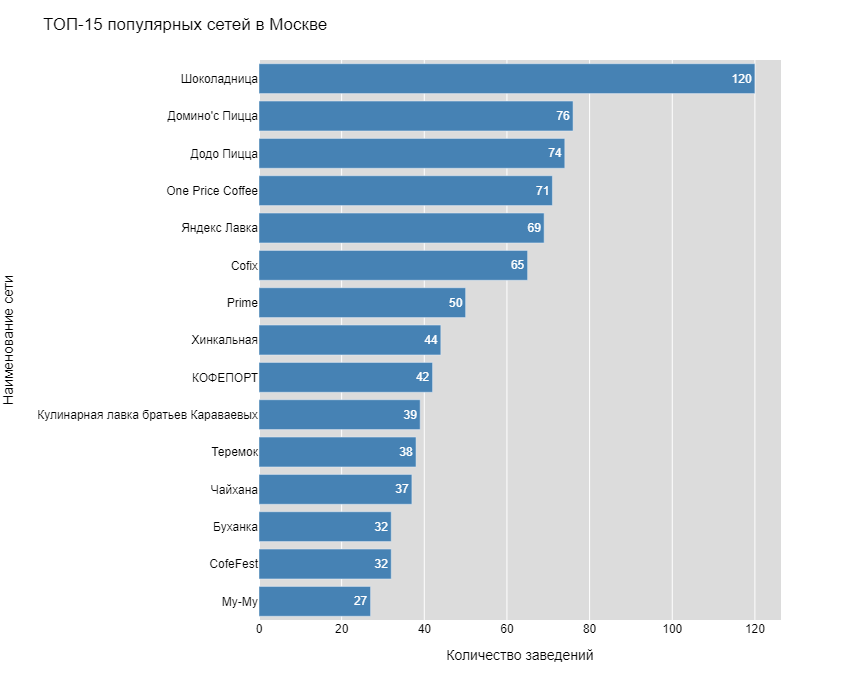

In [29]:
# Отфильтруем данные и оставим только сетевые заведения
pop_chain_count = data[data['chain'] == 'Сетевое']

# Сгруппируем по названиям заведений, посчитаем количество объявлений и переименуем столбец
pop_chain_count = pop_chain_count.groupby('name').size().reset_index(name='total_count')

# Отсортируем и оставим пятнадцать лидеров
pop_chain_count = pop_chain_count.sort_values(by='total_count', ascending=False).head(15)
pop_chain_count = pop_chain_count.reset_index(drop=True)

# Строим столбчатую диаграмму 
fig = px.bar(pop_chain_count.sort_values(by='total_count', ascending=True),  # загружаем данные и заново их сортируем
             x='total_count',  # указываем столбец с данными для оси X
             y='name',  # указываем столбец с данными для оси Y
             text='total_count',  # добавляем аргумент, который отобразит текст с информацией
             color_discrete_sequence=['steelblue']  # задаем цвет столбцов
            )

# Оформляем график
fig.update_layout(title='ТОП-15 популярных сетей в Москве',
                  xaxis_title='Количество заведений',
                  yaxis_title='Наименование сети',
                  width=900,  # ширина графика
                  height=700,  # высота графика
                  font=dict(
                      family="Arial",  # шрифт
                      size=12,  # размер шрифта
                      color="black"  # цвет текста
                  ),
                  plot_bgcolor='gainsboro'
                 )

fig.show()

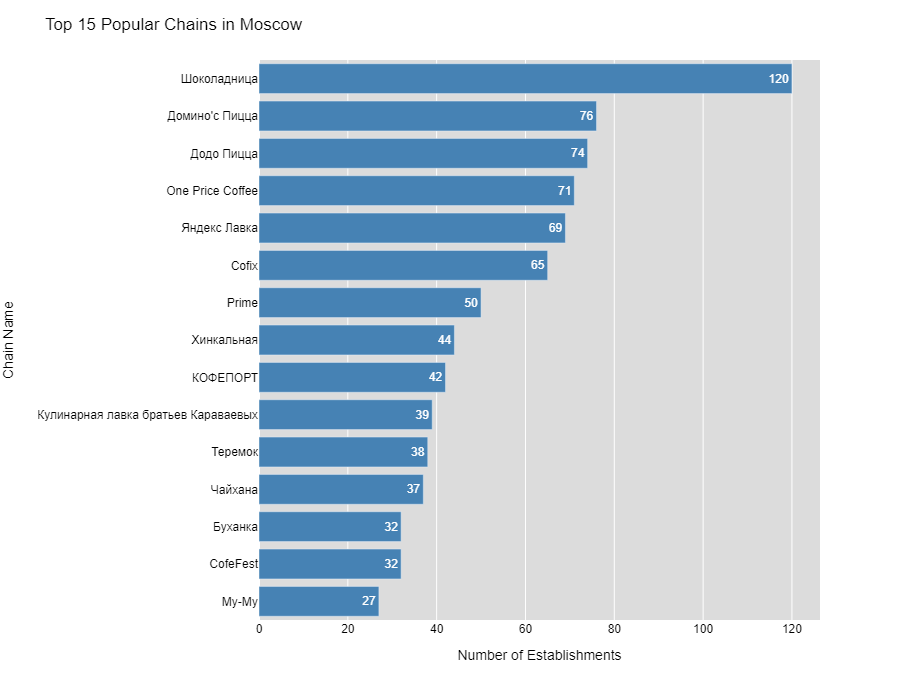

In [30]:
local_image_path = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\Top_15_popular_chains_in_Moscow.png'
Image(filename=local_image_path)

Уточним, к каким категориям преимущественно относятся заведения топ-15 сетей Москвы и визуализируем полученные данные. 

In [31]:
# Выведим данные о категориях заведений, входящих в ТОП-15 сетей Москвы
pop_chain_count_with_category = pop_chain_count.merge(data[['name', 'category']], on='name', how='left')
pop_chain_count_with_category = pop_chain_count_with_category.drop_duplicates()
pop_chain_count_with_category

name  total_count         category
0                            Шоколадница          120          кофейня
7                            Шоколадница          120             кафе
120                       Домино'с Пицца           76         пиццерия
196                           Додо Пицца           74         пиццерия
270                     One Price Coffee           71          кофейня
341                         Яндекс Лавка           69         ресторан
410                                Cofix           65          кофейня
475                                Prime           50         ресторан
512                                Prime           50             кафе
525                           Хинкальная           44  быстрое питание
526                           Хинкальная           44             кафе
527                           Хинкальная           44         ресторан
533                           Хинкальная           44         столовая
535                           Хинкальная           44          бар,паб
569                             КОФЕПОРТ           42          кофейня
611  Кулинарная лавка братьев Караваевых           39             кафе
650                              Теремок           38         ресторан
657                              Теремок           38  быстрое питание
688                              Чайхана           37             кафе
691                              Чайхана           37  быстрое питание
695                              Чайхана           37         ресторан
725                             CofeFest           32          кофейня
741                             CofeFest           32             кафе
757                              Буханка           32         булочная
766                              Буханка           32          кофейня
787                              Буханка           32             кафе
789                                Му-Му           27             кафе
791                                Му-Му           27         ресторан
792                                Му-Му           27          кофейня
793                                Му-Му           27  быстрое питание
801                                Му-Му           27         пиццерия
806                                Му-Му           27         столовая
811                                Му-Му           27          бар,паб

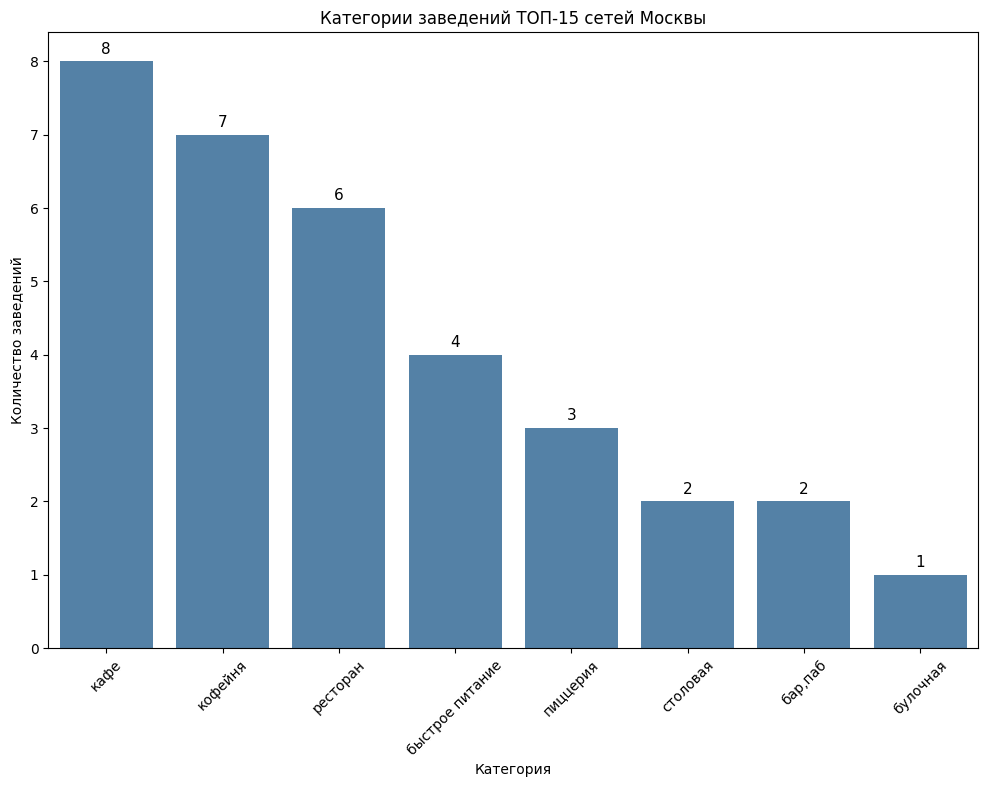

In [32]:
# Создаем DataFrame для значений и их подсчета
category_counts = pop_chain_count_with_category['category'].value_counts().reset_index()
category_counts.columns = ['category', 'total_count']

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='category', y='total_count', data=category_counts, color='steelblue')

# Добавим метки данных на каждый столбец
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11)

# Добавим подписи
plt.title('Категории заведений ТОП-15 сетей Москвы')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45)
plt.show()

В топ-3 входят широко распространенные сети, хорошо известные как жителям Москвы, так и прочих регионов России. Представленные в списке сетевые заведения относятся преимущественно к категориям кафе, кофейня, ресторан. Всех их объединяет возможность для посетителя поесть относительно быстро, выбрав из уже готовых блюд либо заказав еду и напитки с относительно коротким временем приготовления. 

### Количество и категории заведений по районам

Ранее мы выводили 9 административных районов Москвы, присутствующих в датасете. Отобразим общее количество заведений и количество заведений каждой категории по районам. 

In [33]:
# Создадим сводную таблицу с разбивкой по районам и категориям заведений
district_category_count = data.pivot_table(
    index='district', 
    columns='category', 
    aggfunc='size', 
    fill_value=0
).reset_index()

# Добавим столбец с общим количеством заведений по району
district_category_count['total_count'] = district_category_count.iloc[:, 1:].sum(axis=1)

# Отсортируем по общему количеству в порядке убывания
district_category_count = district_category_count.sort_values(by='total_count', ascending=False)\
                          .reset_index(drop=True)

district_category_count

category                                 district  бар,паб  булочная  \
0              Центральный административный округ      364        50   
1                 Северный административный округ       68        39   
2                    Южный административный округ       68        25   
3         Северо-Восточный административный округ       63        28   
4                 Западный административный округ       50        37   
5                Восточный административный округ       53        25   
6            Юго-Восточный административный округ       38        13   
7             Юго-Западный административный округ       38        27   
8          Северо-Западный административный округ       23        12   

category  быстрое питание  кафе  кофейня  пиццерия  ресторан  столовая  \
0                      87   464      428       113       670        66   
1                      58   235      193        77       187        41   
2                      85   264      131        73       202        44   
3                      81   269      159        68       182        40   
4                      62   239      150        71       218        24   
5                      71   270      105        72       159        40   
6                      67   282       89        55       145        25   
7                      61   238       96        64       168        17   
8                      30   115       62        40       109        18   

category  total_count  
0                2242  
1                 898  
2                 892  
3                 890  
4                 851  
5                 795  
6                 714  
7                 709  
8                 409

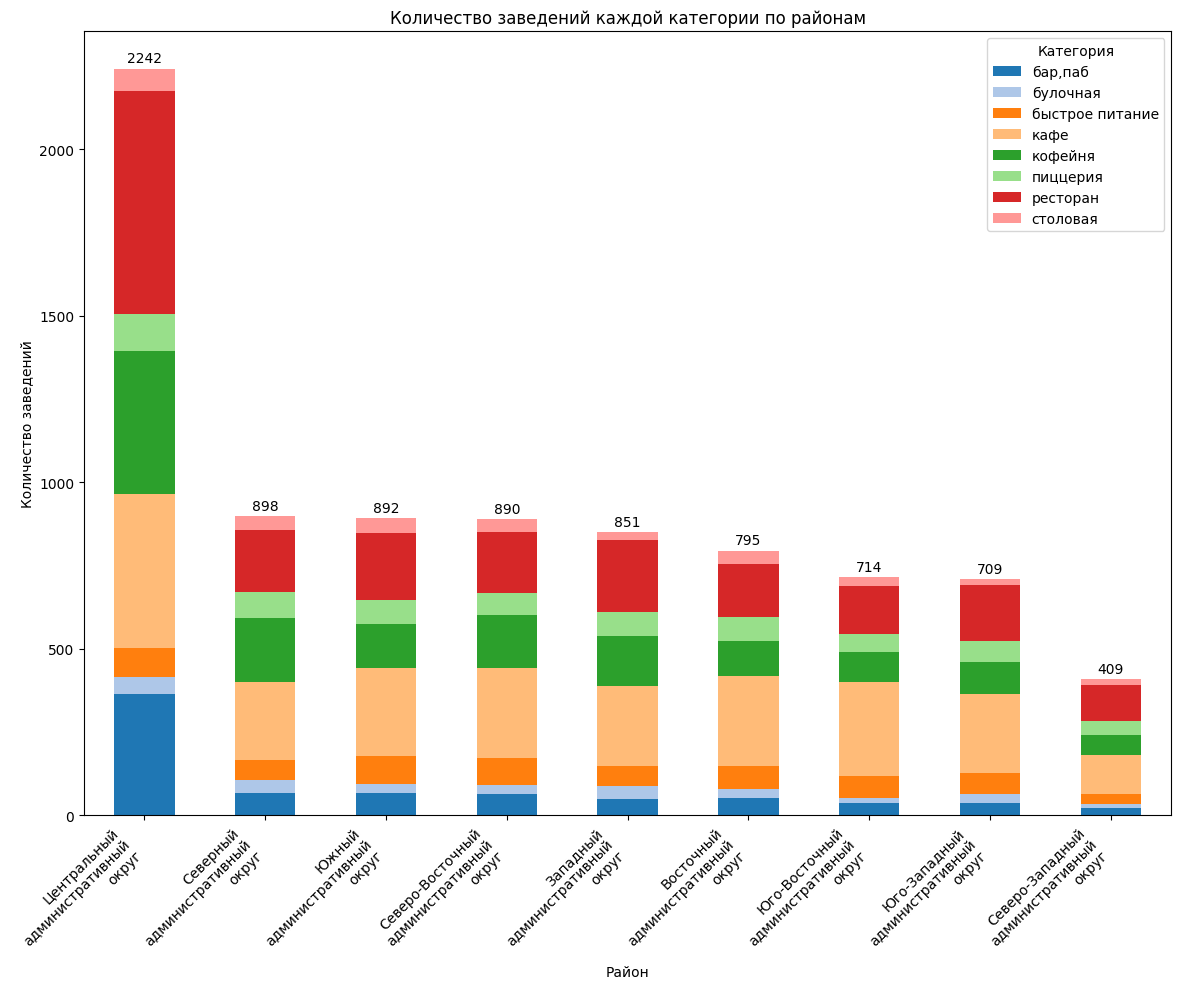

In [34]:
# Установим размер фигуры
plt.rcParams['figure.figsize'] = (12, 10)

# Получим цвета для категорий
colors = plt.cm.tab20.colors  

# Построим столбчатую диаграмму с накоплением
ax = district_category_count.plot(x='district', 
                                  y=list(district_category_count.columns[1:-1]), 
                                  kind='bar', 
                                  stacked=True, 
                                  color=colors)

# Добавим подписи с общим количеством заведений над каждым столбцом
for i, total_count in enumerate(district_category_count['total_count']):
    ax.text(i, total_count + 10, str(total_count), ha='center', va='bottom')

# Укажем метки осей и заголовок
plt.xlabel('Район')
plt.ylabel('Количество заведений')
plt.title('Количество заведений каждой категории по районам')

# Добавим легенду с заголовком
plt.legend(title='Категория', bbox_to_anchor=(1, 1))

# Разобъем метки по оси x на две строки для лучшей читаемости
ax.set_xticklabels([label.replace(' ', '\n') for label in district_category_count['district']], 
                   rotation=45, ha='right')

# Улучшим расположение элементов на графике
plt.tight_layout()

# Показываем график
plt.show()

Из диаграммы очевидно, что абсолютным лидером по количеству заведений всех категорий является Центральный административный округ. Также стоит отметить, что в Центральном округе преимущественный тип заведения - ресторан, в то время как для остальных округов - кафе. 

### Распределение средних рейтингов по категориям заведений

Визуализируем распределение средних рейтингов по категориям заведений.

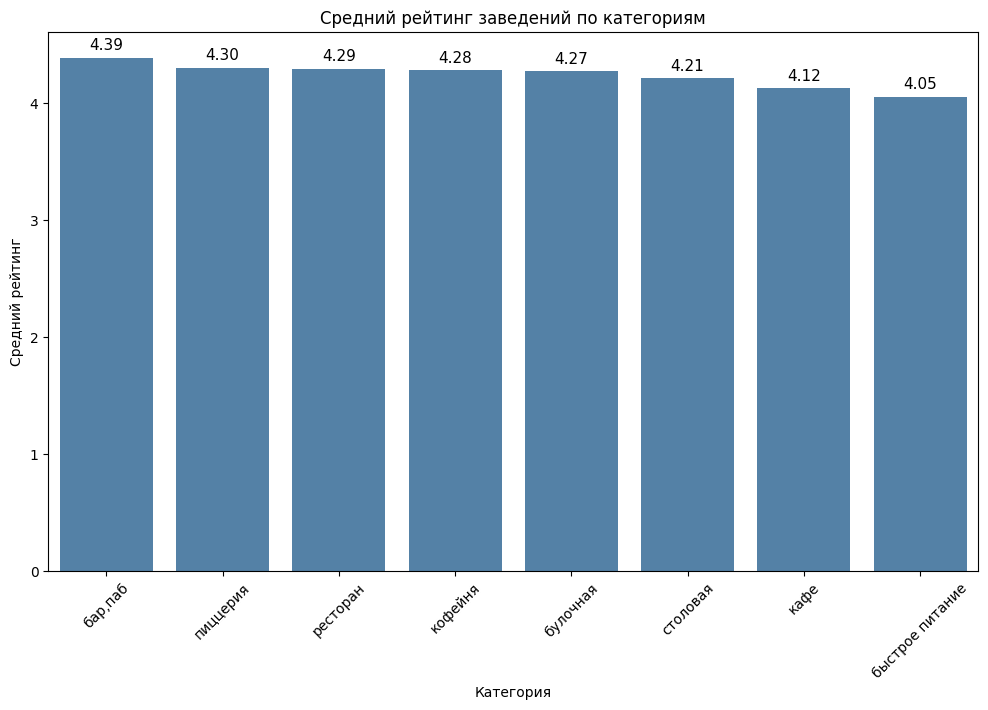

In [35]:
rating_pivot = data.pivot_table(index='category', values='rating', aggfunc='mean')
rating_pivot = rating_pivot.sort_values(by = 'rating', ascending = False) 
rating_pivot = rating_pivot.reset_index()

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='category', y='rating', data=rating_pivot, color='steelblue')

# Добавим метки данных на каждый столбец
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=11)

# Добавим подписи
plt.title('Средний рейтинг заведений по категориям')
plt.xlabel('Категория')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.show()

Самый высокий средний рейтинг у баров и пабов, самый низкий - у заведений быстрого питания. Однако стоит отметить, что разница между заведениями с самым высоким и самым низким средним рейтингом составляет менее полбалла (при 5-тибальной системе оценки). 

### Картограмма распределения средних рейтингов заведений по районам

Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.

Границы районов Москвы, которые встречаются в датасете, хранятся в файле `admin_level_geomap.geojson`.

In [36]:
# Для каждого округа посчитаем средний рейтинг заведений, которые находятся на его территории:
rating_by_district = data.groupby('district', as_index=False)['rating'].agg('mean')
rating_by_district = rating_by_district.sort_values(by = 'rating')
rating_by_district.reset_index(drop = True)

district    rating
0     Юго-Восточный административный округ  4.101120
1  Северо-Восточный административный округ  4.148764
2      Юго-Западный административный округ  4.172920
3         Восточный административный округ  4.174591
4          Западный административный округ  4.181551
5             Южный административный округ  4.184417
6   Северо-Западный административный округ  4.208802
7          Северный административный округ  4.239644
8       Центральный административный округ  4.377520

In [37]:
# Чтение JSON файла с путями
with open('config.json', 'r', encoding='utf-8') as f:
    config = json.load(f)

# Загрузка GeoJSON-файла с границами округов Москвы
state_geo_path = config['moscow_map']

# Проверка и загрузка GeoJSON данных
with open(state_geo_path, 'r', encoding='utf-8') as f:
    state_geo = geojson.load(f)

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=rating_by_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
    opacity=0.5  
).add_to(m)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)

# Выводим карту
# m

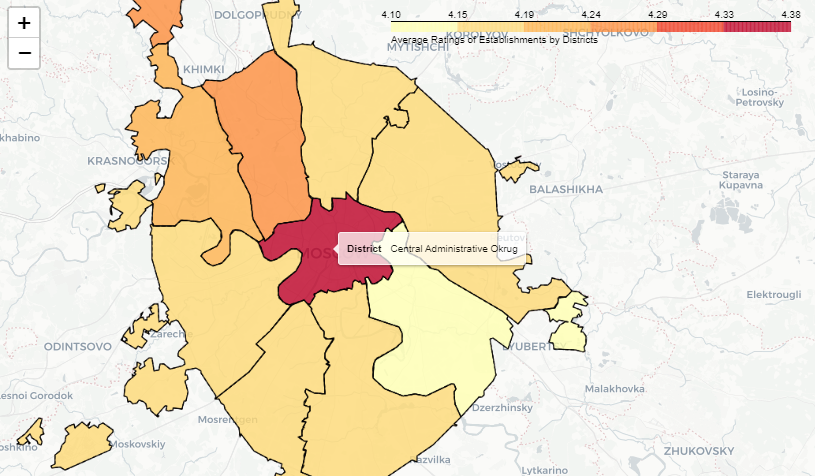

In [38]:
local_image_path_2 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\3.8. Choropleth Map.png'
Image(filename=local_image_path_2)

В Центральном административном округе не только находится большинство всех заведений, но они еще и отличаются самым высоким рейтингов. Следующие по высокорейтинговости заведений - Северный и Северо-Западный административные округа. 

### Картограмма всех заведений

Отобразим все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [39]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# Пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)

# Применяем функцию create_clusters() к каждой строке датафрейма
# data.apply(create_clusters, axis=1)

# Выводим карту
# m

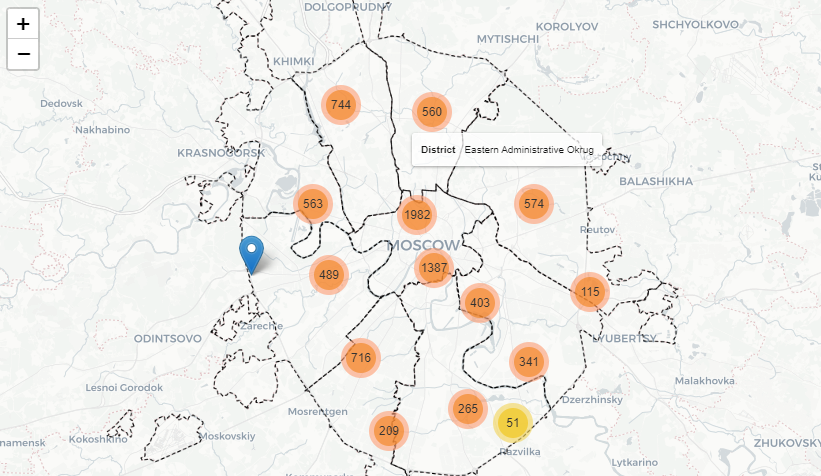

In [40]:
local_image_path_3 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\3.9. Choropleth Map.png'
Image(filename=local_image_path_3)

Карта с разбивкой на кластеры только подтверждает полученные ранее данные - наибольшее количество заведений сконцентрировано в Центральном административном округе. 

### Топ-15 улиц по количеству заведений

Найдем топ-15 улиц по количеству заведений и построим график распределения количества заведений и их категорий по этим улицам. 

In [41]:
# Сгруппируем по названиям улиц, посчитаем количество объявлений и переименуем столбец
streets_count = data.groupby('street').size().reset_index(name='total_count')

# Отсортируем и оставим пятнадцать лидеров
streets_count = streets_count.sort_values(by='total_count', ascending=False).head(15)
streets_count = streets_count.reset_index(drop=True)

# Соединим с категориями заведений
streets_count_with_category = streets_count.merge(data[['street', 'category']], on='street', how='left')

# Создадим сводную таблицу с разбивкой по категориям заведений
streets_category_count = streets_count_with_category.pivot_table(
    index='street', 
    columns='category', 
    values='total_count', 
    aggfunc='size', 
    fill_value=0
).reset_index()

# Убедимся, что все столбцы, кроме 'street', являются числовыми
numerical_columns = streets_category_count.columns.drop('street')
streets_category_count[numerical_columns] = streets_category_count[numerical_columns].apply(pd.to_numeric)

# Добавим столбец с общим количеством объявлений по улицам
streets_category_count['total_count'] = streets_category_count[numerical_columns].sum(axis=1)

# Отсортируем таблицу по общему количеству объявлений
streets_category_count = streets_category_count.sort_values(by='total_count', ascending=False).reset_index(drop=True)

streets_category_count

category                  street  бар,паб  булочная  быстрое питание  кафе  \
0                  проспект Мира       12         4               21    53   
1              Профсоюзная улица        6         4               15    35   
2           проспект Вернадского        7         1               12    25   
3             Ленинский проспект       10         3                2    26   
4         Ленинградский проспект       15         4                2    12   
5              Дмитровское шоссе        6         2               10    23   
6                Каширское шоссе        2         0               10    20   
7               Варшавское шоссе        6         0                7    18   
8            Ленинградское шоссе        5         2                5    13   
9                           МКАД        1         0                9    45   
10              Люблинская улица        5         0                5    26   
11                улица Вавилова        2         2               11    15   
12          Кутузовский проспект        2         1                2    14   
13          улица Миклухо-Маклая        3         0                4    21   
14               Пятницкая улица        9         3                2     7   

category  кофейня  пиццерия  ресторан  столовая  total_count  
0              36        11        45         2          184  
1              18        15        26         3          122  
2              16        12        33         2          108  
3              23         5        33         5          107  
4              25         9        25         3           95  
5              11         8        24         4           88  
6              16         5        19         5           77  
7              14         4        20         7           76  
8              13         3        26         3           70  
9               4         0         5         1           65  
10             11         1        10         2           60  
11             10         3        12         0           55  
12             13         3        16         3           54  
13              4         2        15         0           49  
14              6         3        18         0           48

In [ ]:
# Строим столбчатую диаграмму
plt.rcParams['figure.figsize'] = (12, 6)
colors = plt.cm.tab20.colors  
streets_category_count.plot(x='street', 
                            y=list(streets_category_count.columns[1:-1]), 
                            kind='bar', 
                            stacked=True, 
                            color=colors)

# Добавляем подписи с общим количеством заведений над каждым столбцом
for i, total_count in enumerate(streets_category_count['total_count']):
    plt.text(i, total_count + 10, str(total_count), ha='center', va='bottom')

plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.title('Общее количество заведений на ТОП-15 улицах с разделением по категориям')
plt.legend(title='Категория', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()  

С изрядным отрывом по общему количеству заведений лидирует проспект Мира, далее следуют Профсоюзная улица, проспект Вернадского и Ленинский проспект. Из особенностей стоит выделить МКАД, где категория "кафе" составляет подавляющее большинство из всех прочих категорий заведений. 

### Улицы с одним заведением

Найдем улицы, на которых находится только один объект общепита. 

In [ ]:
# Найдем улицы, на которых находится только один объект общепита
streets_count = data.groupby('street').size().reset_index(name='total_count')
one_place_streets = streets_count.query('total_count == 1')['street']

# Отфильтруем данные и выведем строки из исходного датафрейма для найденных улиц
one_place_streets_filtered_data = data.query('street in @one_place_streets')

one_place_streets_filtered_data_st = f'''
<div style="max-height:200px; overflow:auto;">
    {one_place_streets_filtered_data.to_html(index=True)}
</div>
'''

display(HTML(one_place_streets_filtered_data_st))

Нанесем данные о заведениях, которые являются единственными на своей улице, на карту. 

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# Пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['category']} {row['rating']}",
    ).add_to(marker_cluster)

# Применяем функцию create_clusters() к каждой строке датафрейма
# one_place_streets_filtered_data.apply(create_clusters, axis=1)

# Выводим карту
# m

In [ ]:
local_image_path_4 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\Streets with One Establishment.png'
Image(filename=local_image_path_4)

На улицах только с одним заведением можно встретить места, относящиеся ко всем категориям. Объединяющим для всех заведений является расположение - либо они находятся на переферии, где относительно мало заведений, либо, при нахождении в центральной части города, располагаются в переулках, на маленьких улицах. 

### Картограмма значений средних чеков по округам

Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитаем медиану этого столбца для каждого района. Используем это значение в качестве ценового индикатора района. Построим фоновую картограмму (хороплет) с полученными значениями для каждого района. 

In [ ]:
# Для каждого округа посчитаем медианное значение среднего чека заведений, которые находятся на его территории:
bill_by_district = data.groupby('district', as_index=False)['middle_avg_bill'].agg('median')
bill_by_district = bill_by_district.sort_values(by = 'middle_avg_bill')
bill_by_district.reset_index(drop = True)

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=bill_by_district,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по районам',
    opacity=0.5  
).add_to(m)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)
# выводим карту
# m

In [ ]:
local_image_path_5 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\3.12. Choropleth Map of Average Check Values.png'
Image(filename=local_image_path_5)

По карте и абсолютным данным видно, что лидерами по размеру среднего чека являются Центральный и Западный административные округа. При этом разница между медианным средним чеком в Центральном административном округе и округах с самой низкой ценой (Северов-Восточный, Юго-Восточный и Южный) составляет больше 200%.

### Картограмма средней цены чашки капучино по округам

Проведем аналогичное исследования на основе средней цены чашки капучино.

In [ ]:
# Для каждого округа посчитаем медианное значение чашки капучино в заведениях, которые находятся на его территории:
coffee_by_district = data.groupby('district', as_index=False)['middle_coffee_cup'].agg('median')
coffee_by_district = coffee_by_district.sort_values(by = 'middle_coffee_cup')
coffee_by_district.reset_index(drop = True)

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_by_district,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Медианная цена чашки капучино по районам',
    opacity=0.5  
).add_to(m)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)
# выводим карту
# m

In [ ]:
local_image_path_6 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\3.13. Choropleth Map of Average Price for a Cappuccino.png'
Image(filename=local_image_path_6)

В отличие от среднего чека по заведениям при оценке медианной цены чашки капучино в лидеры выходят три округа - к Центральному и Западному добавился Юго-Западный административный округ. Однако здесь стоит отметить, что медианный разброс цен на капучино значительно меньше разброса цен на еду - там разброс цен между самым большим и самым маленьким средним чеком был более чем в 2 раза, здесь же разница составляет только около 45%, что делает рынок значительно более конкурентным. 

### Картограмма средней цены бокала пива по округам

Также проведем аналогичное исследования на основе средней цены бокала пива.

In [ ]:
# Для каждого округа посчитаем медианное значение бокала пива в заведениях, которые находятся на его территории:
beer_by_district = data.groupby('district', as_index=False)['middle_beer_glass'].agg('median')
beer_by_district = beer_by_district.sort_values(by = 'middle_beer_glass')
beer_by_district.reset_index(drop = True)

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=beer_by_district,
    columns=['district', 'middle_beer_glass'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Медианная цена бокала пива по районам',
    opacity=0.5  
).add_to(m)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)
# выводим карту
# m

In [ ]:
local_image_path_7 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\3.14. Choropleth Map of Average Price for a Beer.png'
Image(filename=local_image_path_7)

Центральный округ опять лидирует по медианной цене бокала пива, однако округа, идущие за ним, распределяются иначе чем распределение по цене на еду и кофе - второе место разделяют Западный, Северо-Восточный и Юго-Восточный округа. 

В целом можно сказать, что лидерами по количеству заведений заведений Москвы являются кафе и рестораны, меньше всего столовых и булочных. Наибольшее среднее количество посадочных мест у баров/пабов и ресторанов, наименьшее – у кафе. При этом количество заведений конкретной категории практически не сказывается на их среднем рейтинге, который в зависимости от категории заведения колеблется менее чем на 0,5 балла при 5-тибальной системе оценки. 
Несетевые заведения примерно на треть преобладают над сетевыми. При этом несетевыми чаще бывают кафе, рестораны, бары/пабы, заведения быстрого питания и столовые. Сетевые места чаще представлены булочными, пиццериями и кофейнями, хотя у двух последних категорий доля сетевых и несетевых мест практически одинакова. 
Среди самых популярных сетей лидерами являются те, которые представлены как в Москве, так и в других регионах. В топ-3 вошли такие сети как «Шоколадница» (со значительным отрывом), «Домино’с Пицца» и «Додо Пицца».
По количеству заведений всех категорий с существенным отрывом лидирует Центральный округ. Также этот район является лидером по среднему рейтингу заведений, их количеству, среднему чеку, а также медианной цене кофе и пива. 
Наибольшее количество заведений располагается на самых крупных улицах, из топ-5 четыре позиции по данному показателю заняли проспекты - Мира, Вернадского, Ленинский и Ленинградский - и только одну - Профсоюзная улица. 
Наименьшее количество заведений расположено в центре в переулках и маленьких улицах либо на периферии. 

## Детализированное исследование: открытие кофейни

У заказчика, заказавшего исследование, есть идея открыть в Москве популярную и доступную кофейню. Заказчик не боится конкуренции в этой сфере, хотя кофеен в больших городах уже достаточно. Попробуем определить, насколько релевантна идея клиента.

### Количество кофеен

In [ ]:
# Определим количество кофеен в датафрейме
len(data.loc[data['category'] == 'кофейня'])

Из 8400 строк с информацией о заведениях общественного питания 1413 содержат информацию о кофейнях. Таким образом, доля кофеен составляет около 17%.

### Особенности расположения кофеен

Выясним, в каких районах кофеен больше всего и каковы особенности их расположения.

In [ ]:
# Отфильтруем из общего датафрейма только кофейни
coffee_shop = data.loc[data['category'] == 'кофейня']

coffee_shop_by_district = coffee_shop.groupby('district', as_index=False)['name'].agg('count')
coffee_shop_by_district = coffee_shop_by_district.sort_values(by = 'name')
coffee_shop_by_district = coffee_shop_by_district.reset_index(drop = True)
coffee_shop_by_district

In [ ]:
coffee_shop_by_district['name'].sum()

In [ ]:
# Отобразим все кофейни на карте с помощью кластеров средствами библиотеки folium
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# Пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# Применяем функцию create_clusters() к каждой строке датафрейма
coffee_shop.apply(create_clusters, axis=1)

# Создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_shop_by_district,
    columns=['district', 'name'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.5,
    legend_name='Количество кофеен по районам',
    opacity=0.5  
).add_to(m)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)

# выводим карту
# m

In [ ]:
local_image_path_8 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\4.2. Characteristics of Coffee Shop Locations.png'
Image(filename=local_image_path_8)

Больше всего кофеен, аналогично всем прочим заведениям, в Центральном округе. При этом плотность расположения кофеен в данном округе почти в два раза больше, чем у следующего по плотности Северного административного округа. Касательно мест расположения кофеен, по карте видно, что данная категория заведений очень часто располагается на пересечении двух и более улиц, что логично, поскольку посетители чаще хотят взять кофе в той точке, где им это удобно, то есть кофейня не является точкой притяжения трафика, как ресторан, а наоборот открывается в наиболее проходимых местах. 

### Круглосуточные кофейни

Посмотрим, есть ли круглосуточные кофейни. Какой долю они составляют. 

In [ ]:
# Преобразуем значения True и False в текстовые метки
coffee_shop_copy = coffee_shop.copy()
coffee_shop_copy['is_24_7'] = coffee_shop_copy['is_24_7'].replace({True: 'Круглосуточно', False: 'Некруглосуточно'})

# Построим столбчатую диаграмму seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='is_24_7', data=coffee_shop_copy, hue='is_24_7', palette=['steelblue', 'darkorange'], legend=False)
plt.title('Соотношение круглосуточных и некруглосуточных кофеен')
plt.xlabel('Тип заведения')
plt.ylabel('Количество')
plt.show()

Отметим на карте круглосуточные заведения. 

In [ ]:
coffee_shop_24_7 = coffee_shop.loc[coffee_shop['is_24_7'] == True]

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# применяем функцию create_clusters() к каждой строке датафрейма
coffee_shop_24_7.apply(create_clusters, axis=1)


# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)

# выводим карту
# m

In [ ]:
local_image_path_9 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\4.3. 24_7 Coffee Shops.png'
Image(filename=local_image_path_9)

Круглосуточных и работающих ежедневно кофеен крайне мало. Большинство из них сконцентрированы в центральном округе. 

### Распределение рейтингов кофеен по округам

Определим, какие у кофеен рейтинги и как они распределяются по районам. Визуализируем полученную информацию. 

In [ ]:
# Для каждого округа посчитаем средний рейтинг заведений, которые находятся на его территории:
coffee_rating_by_district = coffee_shop.groupby('district', as_index=False)['rating'].agg('mean')
coffee_rating_by_district = coffee_rating_by_district.sort_values(by = 'rating')
coffee_rating_by_district.reset_index(drop = True)

In [ ]:
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=coffee_rating_by_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    legend_name='Средний рейтинг коффен по районам',
    opacity=0.5  
).add_to(m)

# Давляем названия округов в виде подсказок
tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Район'],  
    localize=True,  
    sticky=False,  
    labels=True,  
    style="color: black; background-color: rgba(255, 255, 255, 0.8);"  
)

geojson_layer = GeoJson(
    state_geo,
    tooltip=tooltip,
    style_function=lambda feature: {
        'fillColor': 'black',  
        'color': 'black',  
        'weight': 1, 
        'dashArray': '3',  
        'fillOpacity': 0,  
    }
).add_to(m)

# Выводим карту
# m

In [ ]:
local_image_path_10 = r'C:\Users\grigl\Desktop\A. Lapidus\Яндекс Практикум\Редактура проектов\Project 9\4.4. Distribution of Coffee Shop Ratings.png'
Image(filename=local_image_path_10)

Судя по диаграмме лучшие заведения по мнению их посетителей расположены в Центральном и Северо-Западном округах. 

Касательно распределения по стоимости чашки капучино, визуализация полученных данных представлена выше. В зависимости от маркетинговой стратегии можно ориентироваться на среднюю цену в 166 рублей для привлечения максимального количества покупателей, либо на диапазон в 176-187 рублей, чтобы сохранить конкурентное преимущество и при этом не жертвовать прибылью. 

Таким образом, поводя итоги исследования данных о кофейнях города Москвы можно сказать, что наиболее перспективными для открытия новой кофейни являются Западный и Юго-Западный административные округа. Центральный округ сильно перенасыщен заведениями данной категории, в то время как количество кофеен в двух вышеуказанных округах можно охарактеризовать как среднее и низкое соответственно. Оба округа отличаются максимальными ценами на чашку капучино, значит, немного снизив цену можно получить значительное конкурентное преимущество. При этом в обоих округах мало заведений с наивысшим рейтингом, что опять создает предпосылки для успешной конкуренции. Наконец, поскольку в Западном и Юго-Западном округах лишь единицы круглосуточных кофеен, можно рассмотреть возможность занять эту нишу на рынке. 

## Общий вывод

Подводя итоги проведенного анализа данных, можно отметить следующее:
- лидерами по количеству заведений заведений Москвы являются кафе и рестораны, меньше всего столовых и булочных;
- наибольшее среднее количество посадочных мест у баров/пабов и ресторанов, наименьшее – у кафе;
- средний рейтинг заведений практически не зависит от их принадлежности к той или иной категории;
- несетевые заведения примерно на треть преобладают над сетевыми;
- сетевые места чаще представлены булочными, пиццериями и кофейнями, несетевые - остальными категориями;
- самые популярные сети Москвы - это крупные всероссийские сети (в топ-3 вошли «Шоколадница», «Домино’с Пицца» и «Додо Пицца»);
- по количеству заведений всех категорий с существенным отрывом лидирует Центральный округ;
- Центральный округ является лидером по среднему рейтингу заведений, их количеству, среднему чеку, а также медианной цене кофе и пива;
- наибольшее количество заведений располагается на самых крупных улицах, из топ-5 четыре позиции по данному показателю заняли проспекты - Мира, Вернадского, Ленинский и Ленинградский;
- наименьшее количество заведений - в центре в переулках и на маленьких улицах либо на периферии. 

Наиболее перспективными для открытия новой кофейни являются Западный и Юго-Западный административные округа, поскольку в них наблюдается среднее либо низкое количество заведений данной категории, оба округа отличаются максимальными ценами на чашку капучино, а значит, немного снизив цену можно получить значительное конкурентное преимущество. При этом в обоих округах мало заведений с наивысшим рейтингом.